# Combining Dataframes

## Logica de combinación

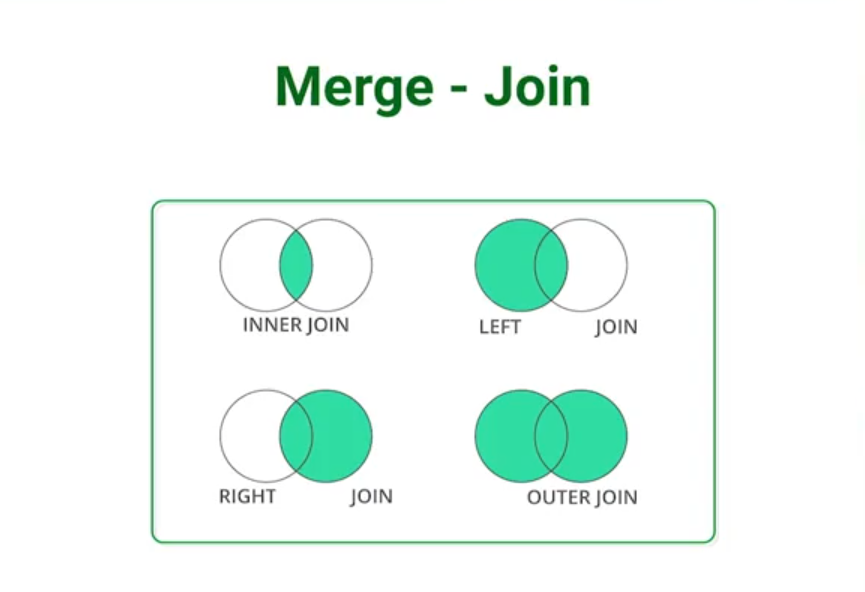
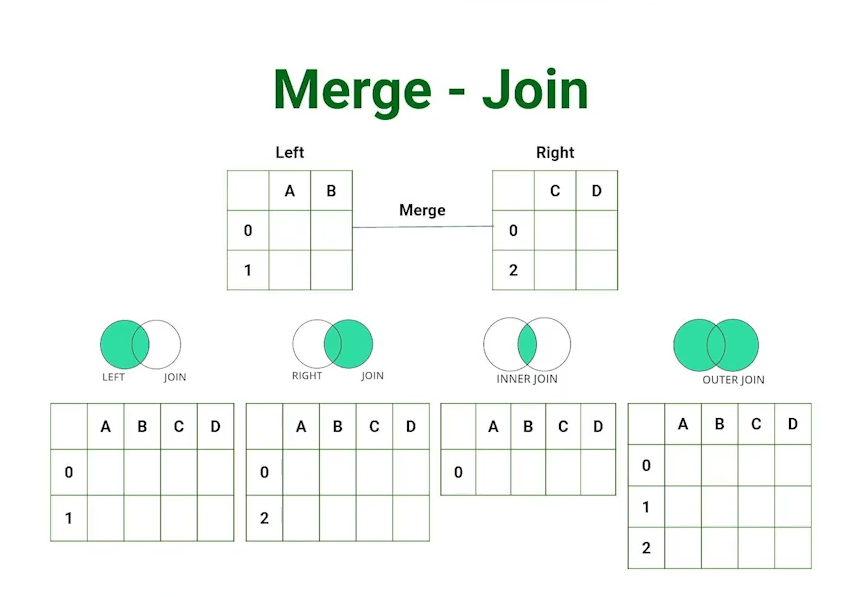
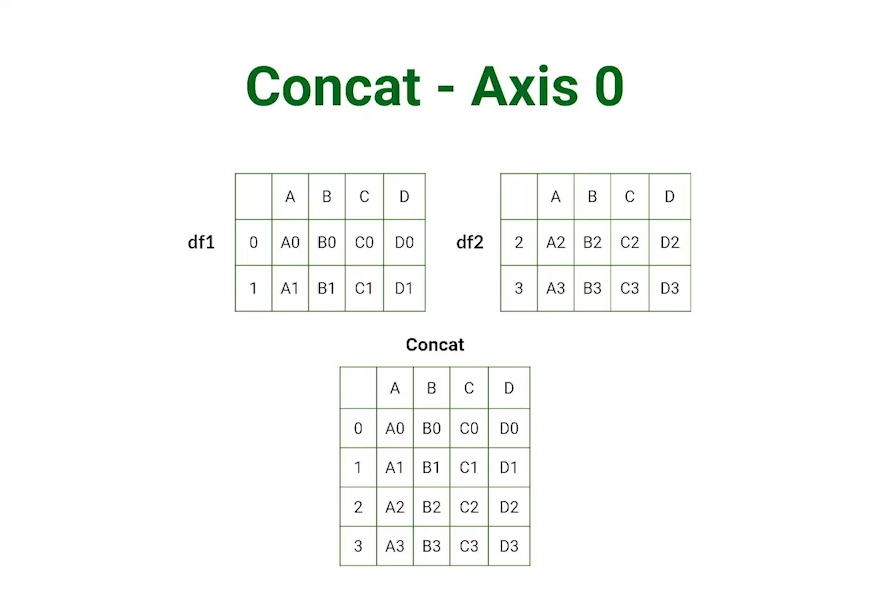
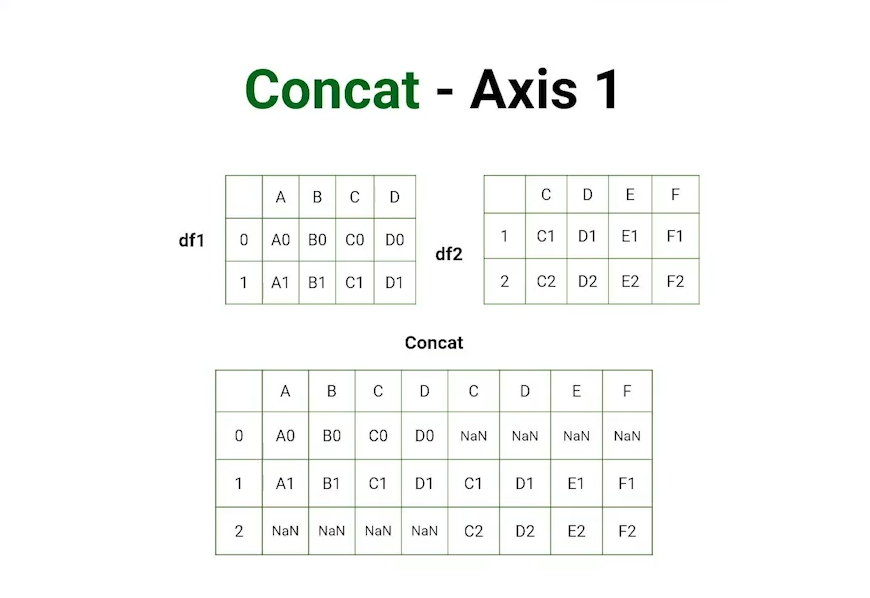

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
df1 = pd.DataFrame({"A": ["a0", "a1", "a2", "a3"],
"B": ["b0", "b1", "b2", "b3"],
"C": ["c0", "c1", "c2", "c3"],
"D": ["d0", "d1", "d2", "d3"]})

df2 = pd.DataFrame({"A": ["a4", "a5", "a6", "a7"],
"B": ["b4", "b5", "b6", "b7"],
"C": ["c4", "c5", "c6", "c7"],
"D": ["d4", "d5", "d6", "d7"]})


In [3]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [4]:
df2

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


## Concat

In [5]:
pd.concat([df1,df2]) # Default Axis = 0

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [6]:
pd.concat([df1,df2], ignore_index=True) # Default Axis = 0

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7


In [7]:
pd.concat([df1,df2], axis=1)

,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4
1,a1,b1,c1,d1,a5,b5,c5,d5
2,a2,b2,c2,d2,a6,b6,c6,d6
3,a3,b3,c3,d3,a7,b7,c7,d7


In [8]:
pd.concat([df1,df2], axis=1, ignore_index=True)

,0,1,2,3,4,5,6,7
0,a0,b0,c0,d0,a4,b4,c4,d4
1,a1,b1,c1,d1,a5,b5,c5,d5
2,a2,b2,c2,d2,a6,b6,c6,d6
3,a3,b3,c3,d3,a7,b7,c7,d7


## Merge

In [9]:
izq = pd.DataFrame({"key": ["k0", "k1", "k2", "k3"],
"A": ["a0", "a1", "a2", "a3"],
"B": ["b0", "b1", "b2", "b3"] })

der = pd.DataFrame({"key": ["k0", "k1", "k2", "k3"],
"C": ["c0", "c1", "c2", "c3"],
"D": ["d0", "d1", "d2", "d3"] })

In [10]:
izq

,key,A,B
0,k0,a0,b0
1,k1,a1,b1
2,k2,a2,b2
3,k3,a3,b3


In [11]:
der

,key,C,D
0,k0,c0,d0
1,k1,c1,d1
2,k2,c2,d2
3,k3,c3,d3


In [12]:
izq.merge(der, on="key")

,key,A,B,C,D
0,k0,a0,b0,c0,d0
1,k1,a1,b1,c1,d1
2,k2,a2,b2,c2,d2
3,k3,a3,b3,c3,d3


In [13]:
izq_2 = pd.DataFrame({"key": ["k0", "k1", "k2", "k3"],
"A": ["a0", "a1", "a2", "a3"],
"B": ["b0", "b1", "b2", "b3"] })

der_2 = pd.DataFrame({"key_2": ["k0", "k1", "k2", "k3"],
"C": ["c0", "c1", "c2", "c3"],
"D": ["d0", "d1", "d2", "d3"] })

In [14]:
izq_2.merge(der_2, left_on="key", right_on="key_2")

,key,A,B,key_2,C,D
0,k0,a0,b0,k0,c0,d0
1,k1,a1,b1,k1,c1,d1
2,k2,a2,b2,k2,c2,d2
3,k3,a3,b3,k3,c3,d3


In [15]:
izq_3 = pd.DataFrame({"key": ["k0", "k1", "k2", "k3"],
"A": ["a0", "a1", "a2", "a3"],
"B": ["b0", "b1", "b2", "b3"] })

der_3 = pd.DataFrame({"key_2": ["k0", "k1", "k2", np.nan],
"C": ["c0", "c1", "c2", "c3"],
"D": ["d0", "d1", "d2", "d3"] })

In [16]:
izq_3

,key,A,B
0,k0,a0,b0
1,k1,a1,b1
2,k2,a2,b2
3,k3,a3,b3


In [17]:
der_3

,key_2,C,D
0,k0,c0,d0
1,k1,c1,d1
2,k2,c2,d2
3,NaN,c3,d3


In [18]:
izq_3.merge(der_3, left_on="key", right_on="key_2") # Inner Join as default

,key,A,B,key_2,C,D
0,k0,a0,b0,k0,c0,d0
1,k1,a1,b1,k1,c1,d1
2,k2,a2,b2,k2,c2,d2


In [20]:
izq_3.merge(der_3, left_on="key", right_on="key_2", how="inner")

,key,A,B,key_2,C,D
0,k0,a0,b0,k0,c0,d0
1,k1,a1,b1,k1,c1,d1
2,k2,a2,b2,k2,c2,d2


In [19]:
izq_3.merge(der_3, left_on="key", right_on="key_2", how="left") # Left Join

,key,A,B,key_2,C,D
0,k0,a0,b0,k0,c0,d0
1,k1,a1,b1,k1,c1,d1
2,k2,a2,b2,k2,c2,d2
3,k3,a3,b3,NaN,NaN,NaN


In [21]:
izq_3.merge(der_3, left_on="key", right_on="key_2", how="right") # Right Join

,key,A,B,key_2,C,D
0,k0,a0,b0,k0,c0,d0
1,k1,a1,b1,k1,c1,d1
2,k2,a2,b2,k2,c2,d2
3,NaN,NaN,NaN,NaN,c3,d3


## Join    

La diferencia de **Join** respecto con **Merge**, es que **Join** va a ir directamente con los indices en lugar de columnas específicas.

Más en detalle, en **Pandas**, la función **Join** se utiliza para combinar dos DataFrames a través de una clave común. Por ejemplo, si tenemos dos DataFrames df1 y df2 que tienen una columna llamada "key", podemos usar la función **Join** para combinar ambos DataFrames en uno nuevo, de la siguiente manera:

```python
result = df1.join(df2, on='key')
```

La función **Join** tiene varios parámetros opcionales que le permiten controlar cómo se realiza el proceso de unión. Por ejemplo, puede especificar el tipo de unión que desea realizar (interna, externa izquierda, externa derecha, cruzada), así como el tipo de índice que se utiliza para realizar la unión.

La función **Merge**, por otro lado, se utiliza para combinar dos DataFrames de una manera similar a la función **Join**, pero con más opciones de control. Por ejemplo, puede especificar el tipo de unión que desea realizar, así como las columnas que desea utilizar para realizar la unión. Además, la función **Merge** le permite realizar uniones basadas en índices, no solo en columnas específicas.

En resumen, la función **Join** es una forma más simple y rápida de combinar dos DataFrames a través de una clave común, mientras que la función **Merge** ofrece más opciones de control y flexibilidad para realizar uniones más complejas.

In [31]:
izq = pd.DataFrame({"A": ["a0", "a1", "a2"],
"B": ["b0", "b1", "b2"]},
index=["k0", "k1", "k2"])

der = pd.DataFrame({"C": ["c0", "c1", "c2"],
"D": ["d0", "d1", "d2"]},
index=["k0", "k2", "k3"])

In [32]:
izq

,A,B
k0,a0,b0
k1,a1,b1
k2,a2,b2


In [33]:
der

,C,D
k0,c0,d0
k2,c1,d1
k3,c2,d2


In [34]:
izq.join(der) # Left Join as default

,A,B,C,D
k0,a0,b0,c0,d0
k1,a1,b1,NaN,NaN
k2,a2,b2,c1,d1


In [36]:
izq.join(der, how="left") # Left Join

,A,B,C,D
k0,a0,b0,c0,d0
k1,a1,b1,NaN,NaN
k2,a2,b2,c1,d1


In [37]:
izq.join(der, how="inner") # Inner Join

,A,B,C,D
k0,a0,b0,c0,d0
k2,a2,b2,c1,d1


In [39]:
izq.join(der, how="right") # Right Join

,A,B,C,D
k0,a0,b0,c0,d0
k2,a2,b2,c1,d1
k3,NaN,NaN,c2,d2


In [40]:
izq.join(der, how="outer") # Outer Join

,A,B,C,D
k0,a0,b0,c0,d0
k1,a1,b1,NaN,NaN
k2,a2,b2,c1,d1
k3,NaN,NaN,c2,d2
